In [1]:
import os
import zipfile

local_zip = 'train_LbELtWX.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('train')
zip_ref.close()

local_zip = 'test_ScVgIM0.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('test')
zip_ref.close()

In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("./train/train.csv")
test = pd.read_csv("./test/test.csv")

In [4]:
train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


In [5]:
train.dtypes

id       int64
label    int64
dtype: object

In [6]:
train['id'] = train['id'].astype('str') + '.png'
test['id'] = test['id'].astype('str') + '.png'

train.head()

,id,label
0,1.png,9
1,2.png,0
2,3.png,0
3,4.png,3
4,5.png,0


In [7]:
train.shape, test.shape

((60000, 2), (10000, 1))

In [8]:
labels_class_name = {'0':'T-shirt/Top', 
                     '1':'Trouser', 
                     '2':'Pullover', 
                     '3':'Dress', 
                     '4':'Coat', 
                     '5':'Sandal',
                     '6':'Shirt', 
                     '7':'Sneaker', 
                     '8':'Bag', 
                     '9':'Ankle Boot'}

In [9]:
train['label'] = train['label'].astype('str')
classes = train.label.unique().tolist()
classes

['9', '0', '3', '2', '7', '5', '1', '6', '4', '8']

In [10]:
import shutil
import random

train_directory = '.\\training'
val_directory = '.\\validation'

train_file_dir = '.\\train\\train'

files_toshow = []
labels_toshow = []

for class_ in classes:
    path_train = os.path.join(train_directory, class_)
    path_val = os.path.join(val_directory, class_)
    
    if os.path.isdir(path_train) | os.path.isdir(path_train):
        print('Already exists')
        filenames = train.groupby('label')['id'].get_group(class_).tolist()
        files_toshow.append([(train_file_dir + os.sep + file) 
                             for file in random.sample(filenames, 2)])
        labels_toshow.append([labels_class_name.get(class_)] * 2)

        
    else:
        os.mkdir(path_train)
        os.mkdir(path_val)
        
        print('Directory Created ', path_train)
        print('Directory Created ', path_val)
        
        filenames = train.groupby('label')['id'].get_group(class_).tolist()
        
        val_files = random.sample(filenames, 550)
        train_files = [file for file in filenames if file not in val_files]
        
        files_toshow.append([(train_file_dir + os.sep + file) 
                             for file in random.sample(filenames, 2)])
        labels_toshow.append([labels_class_name.get(class_)] * 2)
        
        source = [(train_file_dir + os.sep + file) for file in train_files]
        for f in source:
            shutil.copy(f, path_train)
        print('Class ', class_, ' Images Moved in Training Folder')
        print(class_,' having ', len(train_files), ' files in Training Folder')
        
        source = [(train_file_dir + os.sep + file) for file in val_files]
        for f in source:
            shutil.copy(f, path_val)
        print('Class ', class_, ' Images Moved in Validation Folder')
        print(class_,' having ', len(val_files), ' files in Validation Folder')

Directory Created  .\training\9
Directory Created  .\validation\9
Class  9  Images Moved in Training Folder
9  having  5450  files in Training Folder
Class  9  Images Moved in Validation Folder
9  having  550  files in Validation Folder
Directory Created  .\training\0
Directory Created  .\validation\0
Class  0  Images Moved in Training Folder
0  having  5450  files in Training Folder
Class  0  Images Moved in Validation Folder
0  having  550  files in Validation Folder
Directory Created  .\training\3
Directory Created  .\validation\3
Class  3  Images Moved in Training Folder
3  having  5450  files in Training Folder
Class  3  Images Moved in Validation Folder
3  having  550  files in Validation Folder
Directory Created  .\training\2
Directory Created  .\validation\2
Class  2  Images Moved in Training Folder
2  having  5450  files in Training Folder
Class  2  Images Moved in Validation Folder
2  having  550  files in Validation Folder
Directory Created  .\training\7
Directory Created  .

In [11]:
from matplotlib.cbook import flatten
files = list(flatten(files_toshow))
labels_train = list(flatten(labels_toshow))

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 5
ncols = 4

pic_index = 0

<Figure size 432x288 with 0 Axes>

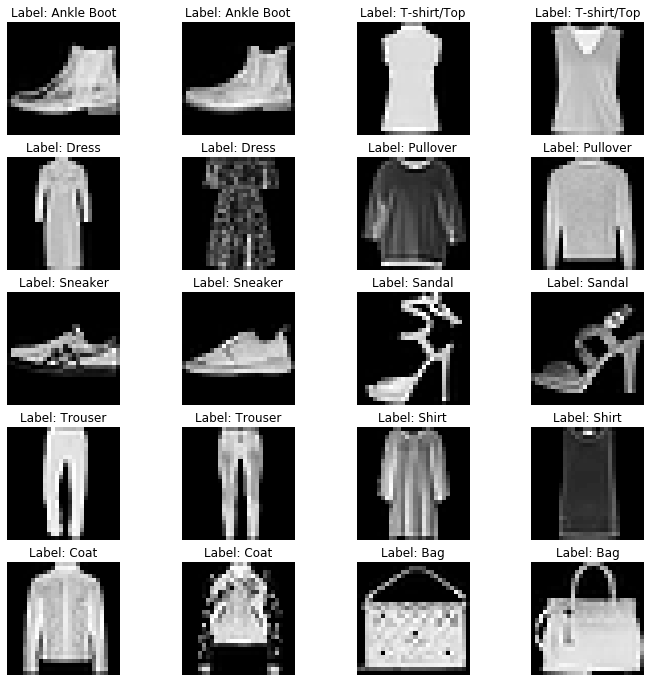

In [13]:
fig = plt.gcf()
plt.figure(figsize=(12,12))

for i, img_path in enumerate(files):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.title("Label: "+labels_train[i])
    plt.imshow(img)

plt.show()

In [14]:
import tensorflow as tf
tf.enable_eager_execution()
from tensorflow import keras
tf.keras.backend.clear_session()

C:\Users\hungu\anaconda.x\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hungu\anaconda.x\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hungu\anaconda.x\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hungu\anaconda.x\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(28, 28), 
    color_mode='rgba',
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    val_directory,
    target_size=(28, 28), 
    color_mode='rgba',
    class_mode='categorical')

Found 54500 images belonging to 10 classes.
Found 5500 images belonging to 10 classes.


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 4)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        592       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2769920   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 3,300,442
Trainable params: 3,300,442
Non-trainable params: 0
______________________________________________

In [17]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adamax
tf.enable_eager_execution()

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print(logs.get('val_acc'))
        if(logs.get('val_acc')>=0.91):
            print("\nReached 91% accuracy so cancelling training!")
            self.model.stop_training = True
        return
            
callbacks = myCallback()

history = model.fit(
    train_generator,
    epochs=15,
    verbose=1,
    validation_data = validation_generator, 
    callbacks=[callbacks])

Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1704/1704 [==============================] - 483s 284ms/step - loss: 0.4525 - acc: 0.8364 - val_loss: 0.3063 - val_acc: 0.8891
Epoch 2/15
1704/1704 [==============================] - 111s 65ms/step - loss: 0.2869 - acc: 0.8948 - val_loss: 0.2772 - val_acc: 0.9031
Epoch 3/15
1704/1704 [==============================] - 133s 78ms/step - loss: 0.2349 - acc: 0.9121 - val_loss: 0.2842 - val_acc: 0.8975
Epoch 4/15
1703/1704 [============================>.] - ETA: 0s - loss: 0.1985 - acc: 0.9259- ETA:0.91327274

Reached 91% accuracy so cancelling training!
1704/1704 [==============================] - 159s 93ms/step - loss: 0.1984 - acc: 0.9259 - val_loss: 0.2468 - val_acc: 0.9133


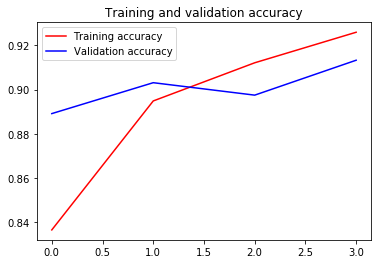

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

C:\Users\hungu\anaconda.x\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


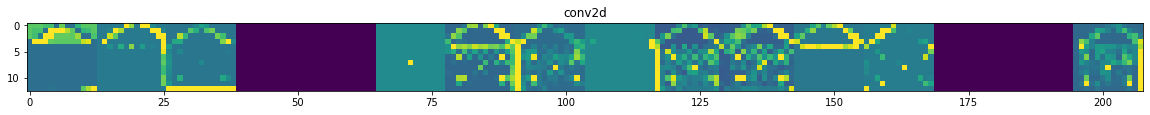

In [20]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = load_img(files[18], target_size=(28, 28), color_mode='rgba')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x /= 255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train.label)

LabelEncoder()

In [22]:
test_file_dir = '.\\test\\test'

test_fn = test.id.tolist()
test_files_path = [(test_file_dir + os.sep + file) for file in test_fn]

In [23]:
len(test_files_path), test.shape

(10000, (10000, 1))

In [24]:
from tensorflow.keras.preprocessing import image

pred_test = []
fns = []

for fn in test_files_path:
    path = fn
    img = image.load_img(path, target_size=(28, 28), color_mode='rgba')
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    pred_test.append(np.argmax(classes))
    fns.append(fn)

In [25]:
test1 = pd.read_csv("./test/test.csv")
df = {'id':test1.id, 'label':encoder.inverse_transform(pred_test)}
submission = pd.DataFrame(df)
submission.to_csv('sub.csv', index=False)

In [26]:
submission.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


In [27]:
submission.sample(10)

,id,label
32,60033,3
98,60099,2
9065,69066,1
1007,61008,9
2255,62256,5
9327,69328,4
4454,64455,0
9028,69029,6
6468,66469,3
9613,69614,1


In [28]:
test_files = submission.sample(16)
test_files['id'] = test_files['id'].astype('str') + '.png'
test_files['label'] = test_files['label'].map(labels_class_name)
files_test = [(test_file_dir + os.sep + file) for file in test_files.id.tolist()]
label_test = test_files.label.tolist()

In [29]:
test_files

,id,label
4500,64501.png,Coat
8882,68883.png,Coat
5763,65764.png,Dress
7210,67211.png,Shirt
3296,63297.png,Pullover
7053,67054.png,T-shirt/Top
2526,62527.png,Dress
8338,68339.png,Sneaker
6103,66104.png,Coat
327,60328.png,Sneaker


<Figure size 432x288 with 0 Axes>

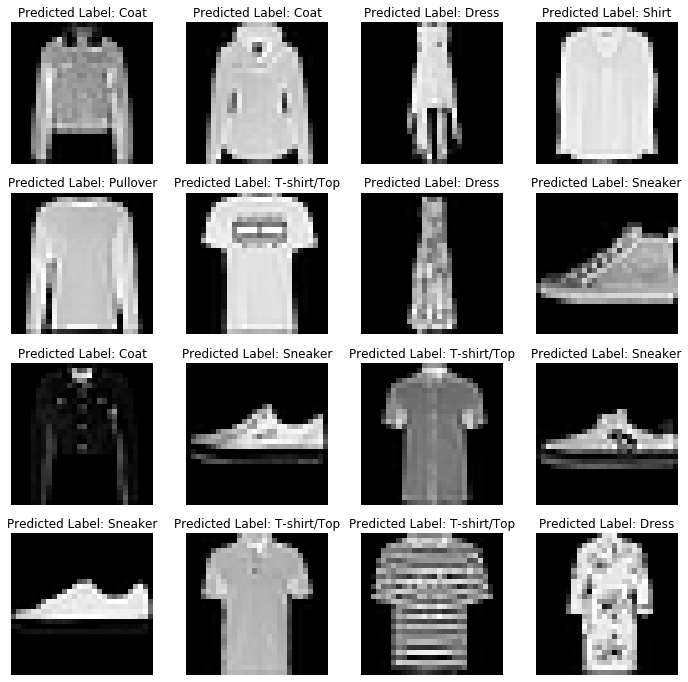

In [30]:
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
plt.figure(figsize=(12,12))

for i, img_path in enumerate(files_test):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.title("Predicted Label: "+label_test[i])
    plt.imshow(img)

plt.show()